<a href="https://colab.research.google.com/github/SakshiNarwadiya/Python-Projects/blob/main/CENSUS_INCOME_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>CENSUS INCOME PROJECT </H2>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/census-income (7).csv")

In [ ]:
df.head() #retrieving the first five records

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.rename(columns={df.columns[-1]: 'annual_income'}, inplace=True) #since the last column is not named, we named it annual income


In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'annual_income'],
      dtype='object')

In [ ]:
df[' native-country'].unique() #unique values of native-country column

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df["annual_income"].unique() #unique values of annual_income column

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
df.isnull().sum() #checking the null values

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.dropna(inplace=True) #dropping the null values

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# Convert the 'native-country' column to string type
df[' native-country'] = df[' native-country'].astype(str)

In [ ]:
#there is a ? in native country column values lets replace it
df[df[' native-country'].str.strip() == '?']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [ ]:
#replacing the '?' with nan
df[" native-country"]=  df.replace("?", np.nan, inplace=True)

In [ ]:
# checking the duplicates
df.duplicated().sum()

25

In [ ]:
# dropping the duplicates
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Label encoding the dataframe|
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       'annual_income'],
      dtype='object')

In [ ]:
#checking the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32536 non-null  int64 
 1    workclass       32536 non-null  object
 2    fnlwgt          32536 non-null  int64 
 3    education       32536 non-null  object
 4    education-num   32536 non-null  int64 
 5    marital-status  32536 non-null  object
 6    occupation      32536 non-null  object
 7    relationship    32536 non-null  object
 8    race            32536 non-null  object
 9    sex             32536 non-null  object
 10   capital-gain    32536 non-null  int64 
 11   capital-loss    32536 non-null  int64 
 12   hours-per-week  32536 non-null  int64 
 13   native-country  0 non-null      object
 14  annual_income    32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [ ]:
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,0,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,0,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,0,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,0,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,0,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,0,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,0,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,0,0


MODEL BUILDING

In [ ]:
#splitting the data into X and Y
X = df.iloc[:, :-1]  # All rows, all columns except the last one
Y = df.iloc[:, -1]   # All rows, only the last column

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,0
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,0


In [ ]:
Y

,annual_income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.3, random_state = 56)

In [ ]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
24474,35,4,267798,11,9,0,3,4,4,1,0,0,40,0
2852,54,6,32778,11,9,2,12,5,4,0,0,0,30,0
19414,34,4,317809,9,13,2,4,0,4,1,0,0,50,0
20533,44,4,216411,8,11,5,10,1,4,0,0,0,40,0
6033,41,4,286970,9,13,2,1,0,4,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25851,38,4,809585,9,13,2,12,0,4,1,0,0,40,0
13735,34,6,209768,11,9,2,4,0,4,1,0,0,40,0
3264,36,5,164866,7,12,5,4,1,4,1,0,0,50,0
399,52,5,132178,9,13,2,4,0,4,1,0,0,50,0


In [ ]:
X_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15157,26,4,28443,8,11,4,8,1,4,0,0,0,40,0
4281,64,1,199298,5,4,6,8,4,4,0,0,0,30,0
31524,51,6,99185,7,12,2,4,0,4,1,0,0,40,0
12687,65,4,274916,11,9,6,12,4,4,0,0,0,40,0
7275,42,7,104663,10,16,4,4,1,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18282,39,7,55568,11,9,2,1,5,4,0,0,0,40,0
21716,26,4,238367,11,9,4,3,1,4,1,0,0,40,0
29275,36,4,201117,9,13,2,4,0,4,1,0,0,50,0
7008,49,4,215389,9,13,2,7,0,2,1,0,0,48,0


In [ ]:
Y_train

,annual_income
24474,0
2852,0
19414,1
20533,0
6033,0
...,...
25851,1
13735,0
3264,0
399,1


In [ ]:
Y_test

,annual_income
15157,0
4281,0
31524,1
12687,0
7275,1
...,...
18282,0
21716,0
29275,0
7008,0


<H2>
LET'S TEST THE PREDICTIONS WITH DIFFERENT MODELS:
<h3>
Logistic Regression

Decision Tree

Random Forest
</h3>
</H2>

<H2>
LOGISTIC REGRESSION
</H2>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [ ]:
lr_model

LogisticRegression()

In [ ]:
#training
lr_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#testing
lr_pred = lr_model.predict(X_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import *
# * means importing all the metrics

In [ ]:
lr_accuracy = accuracy_score(Y_test, lr_pred)
print("The Accuracy score is  :", lr_accuracy)

The Accuracy score is  : 0.7838336236041389


<h2>
DECISION TREE CLASSIFIER
</h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [ ]:
#training the model
dt_model = dt_model.fit(X_train,Y_train)
dt_model

DecisionTreeClassifier()

In [ ]:
#testing the model
dt_pred = dt_model.predict(X_test)
dt_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
dt_accuracy = accuracy_score(Y_test, dt_pred)
print("The Accuracy is :",dt_accuracy)

The Accuracy is : 0.8126216576170474


<h2>
RANDOM FOREST
</h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()


In [ ]:
#training the model
rf_model.fit(X_train,Y_train)
rf_model

RandomForestClassifier()

In [ ]:
#testing the model
rf_pred = rf_model.predict(X_test)
rf_pred

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
#accuracy score
rf_accuracy = accuracy_score(Y_test, rf_pred)
print("The Accuracy score is :", rf_accuracy)

The Accuracy score is : 0.8515520950722262


In [ ]:
print("The Accuracy of Logistic Regression is :",lr_accuracy )
print("The Accuracy of Decision Tree is :",dt_accuracy )
print("The Accuracy of Random Forest is :",rf_accuracy )

The Accuracy of Logistic Regression is : 0.7838336236041389
The Accuracy of Decision Tree is : 0.8126216576170474
The Accuracy of Random Forest is : 0.8515520950722262


In [ ]:
# Cleary the Winner is ..... Random Forest

In [ ]:
# Further optimization of Random Forest
trees = [ i for i in range(50,800,50)]

In [ ]:
trees

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]

In [ ]:
for N in trees:
    rf_model=RandomForestClassifier(n_estimators=N,random_state=56)
    rf_model.fit(X_train,Y_train)
    rf_pred=rf_model.predict(X_test)
    acc=accuracy_score(Y_test,rf_pred)
    print("Random Forest with",N," number of Trees having accuracy",acc )

Random Forest with 50  number of Trees having accuracy 0.8515520950722262
Random Forest with 100  number of Trees having accuracy 0.8510398524741317
Random Forest with 150  number of Trees having accuracy 0.8492982276406106
Random Forest with 200  number of Trees having accuracy 0.8510398524741317
Random Forest with 250  number of Trees having accuracy 0.8510398524741317
Random Forest with 300  number of Trees having accuracy 0.8490933306013728
Random Forest with 350  number of Trees having accuracy 0.8489908820817539
Random Forest with 400  number of Trees having accuracy 0.8487859850425161
Random Forest with 450  number of Trees having accuracy 0.8490933306013728
Random Forest with 500  number of Trees having accuracy 0.8495031246798483
Random Forest with 550  number of Trees having accuracy 0.8495031246798483
Random Forest with 600  number of Trees having accuracy 0.8491957791209918
Random Forest with 650  number of Trees having accuracy 0.8489908820817539
Random Forest with 700  nu

In [ ]:
#confusion matrix
cm = confusion_matrix(Y_test, rf_pred)
cm

array([[6830,  545],
       [ 928, 1458]])

<Axes: >

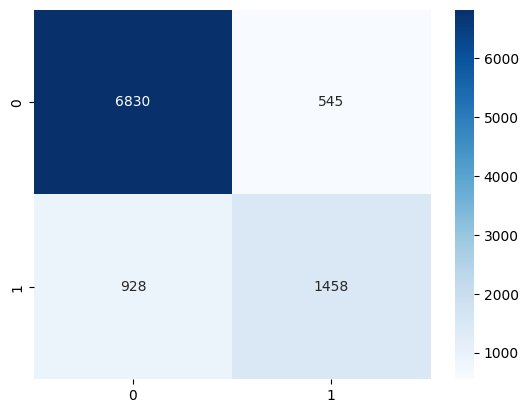

In [ ]:
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")

In [ ]:
6830+1458 # correctly Classifed - positives

8288

In [ ]:
928+545 # wrongly classifed  - negatives

1473